In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Trades_ga.csv', delimiter=';')

# Display the first few rows of the DataFrame
df.head(20)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,5.0
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,5.0
5,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0
6,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0
7,-1,300,RAINFOREST_RESIN,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,5.0
8,-1,400,RAINFOREST_RESIN,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,5.0
9,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0


In [2]:
import pandas as pd
from tabulate import tabulate

df = pd.read_csv('Trades_kelp_ga.csv', delimiter=';')

# Display the first few rows of the DataFrame
# df.head(20)
print(tabulate(df, headers='keys'))

        day    timestamp  product             bid_price_1    bid_volume_1    bid_price_2    bid_volume_2    bid_price_3    bid_volume_3    ask_price_1    ask_volume_1    ask_price_2    ask_volume_2    ask_price_3    ask_volume_3    mid_price    profit_and_loss
----  -----  -----------  ----------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -----------  -----------------
   0     -1            0  RAINFOREST_RESIN          10002               1           9996               2           9995              29          10004               2          10005              29            nan             nan      10003              0
   1     -1            0  KELP                       2028               1           2026               2           2025              29           2029              31            nan             nan            nan           

In [3]:
import pandas as pd
from tabulate import tabulate

df_check = pd.read_csv('Kelp_price_ga.csv', delimiter=';')

print(tabulate(df_check, headers='keys'))

        day    timestamp  product             bid_price_1    bid_volume_1    bid_price_2    bid_volume_2    bid_price_3    bid_volume_3    ask_price_1    ask_volume_1    ask_price_2    ask_volume_2    ask_price_3    ask_volume_3    mid_price    profit_and_loss
----  -----  -----------  ----------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -----------  -----------------
   0     -1            0  RAINFOREST_RESIN          10002               1           9996               2           9995              29          10004               2          10005              29            nan             nan      10003          0
   1     -1            0  KELP                       2028               1           2026               2           2025              29           2029              31            nan             nan            nan             na

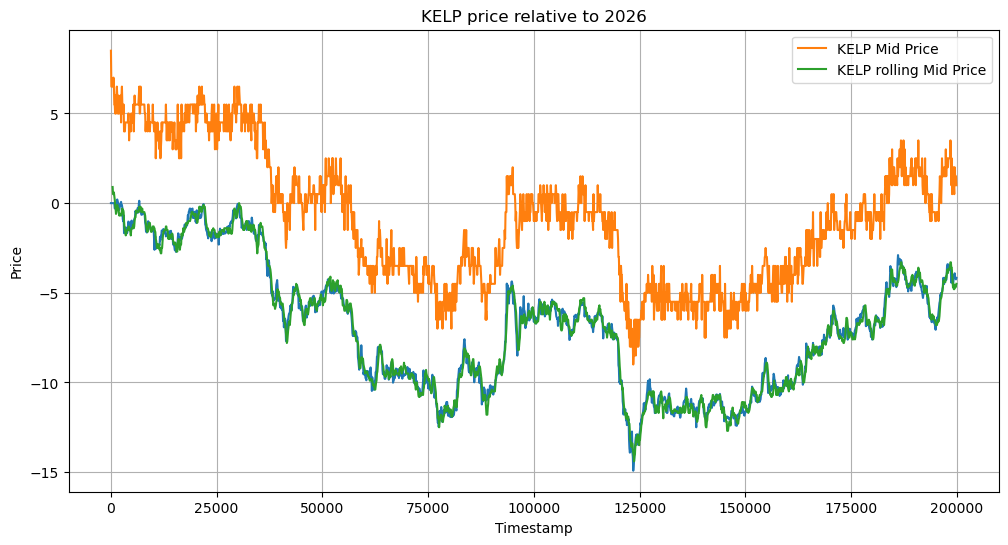

In [4]:
import matplotlib.pyplot as plt

df_kelp = df_check[df_check['product'] == 'KELP']
df_kelp_mid = [(x - 2020) for x in df_kelp['mid_price']]
df_kelp_rolling_mid = [(x - 2026) for x in df_kelp['mid_price'].rolling(window=5).mean()]

# Plot KELP price relative to 2026

plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'], df_kelp['profit_and_loss'])
plt.plot(df_kelp['timestamp'], df_kelp_mid, label='KELP Mid Price')
plt.plot(df_kelp['timestamp'], df_kelp_rolling_mid, label='KELP rolling Mid Price')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('KELP price relative to 2026')
plt.legend()
plt.grid(True)
plt.show()

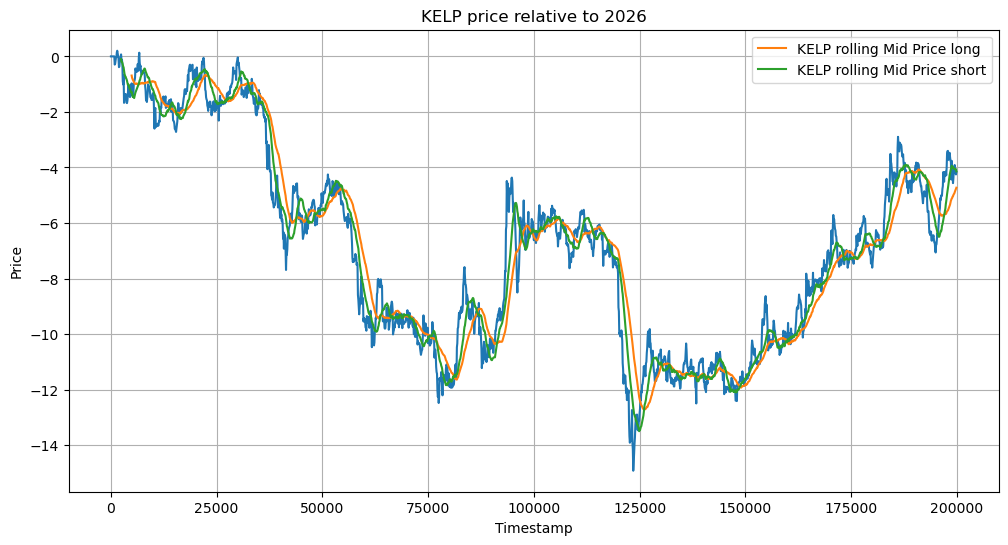

In [5]:
import matplotlib.pyplot as plt

df_kelp_rolling_long = df_kelp['mid_price'].rolling(window=50).mean()
df_kelp_rolling_short = df_kelp['mid_price'].rolling(window=25).mean()
df_kelp_roll_mid_long = [(x - 2026) for x in df_kelp_rolling_long]
df_kelp_roll_mid_short = [(x - 2026) for x in df_kelp_rolling_short]

# Plot KELP price and rolling average

plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'], df_kelp['profit_and_loss'])
plt.plot(df_kelp['timestamp'], df_kelp_roll_mid_long, label='KELP rolling Mid Price long')
plt.plot(df_kelp['timestamp'], df_kelp_roll_mid_short, label='KELP rolling Mid Price short')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('KELP price relative to 2026')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\amino\AppData\Local\Temp\ipykernel_26260\3569354794.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


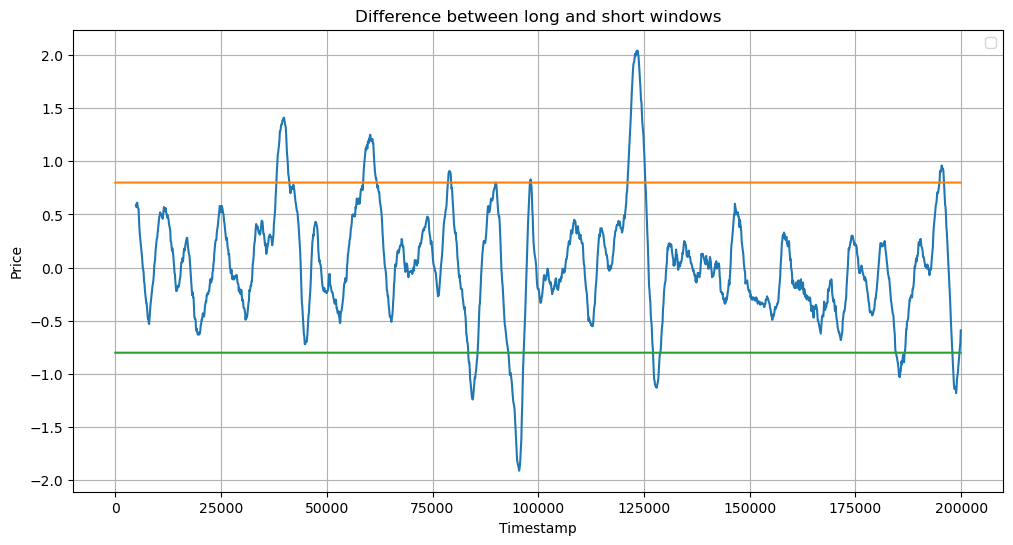

In [6]:
kelp_roll_mid_diff = [df_kelp_roll_mid_long[i] - df_kelp_roll_mid_short[i] for i in range(len(df_kelp_roll_mid_long))]

plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'], kelp_roll_mid_diff)
plt.plot(df_kelp['timestamp'],[0.8 for i in range(len(kelp_roll_mid_diff))])
plt.plot(df_kelp['timestamp'],[-0.8 for i in range(len(kelp_roll_mid_diff))])
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Difference between long and short windows')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
import numpy as np
import math

bid_price_1 = list(df_kelp['bid_price_1'])
bid_volume_1 = list(df_kelp['bid_volume_1'])

bid_price_2 = list(df_kelp['bid_price_2'])
bid_volume_2 = list(df_kelp['bid_volume_2'])

bid_price_3 = list(df_kelp['bid_price_3'])
bid_volume_3 = list(df_kelp['bid_volume_3'])

ask_price_1 = list(df_kelp['ask_price_1'])
ask_volume_1 = list(df_kelp['ask_volume_1'])

ask_price_2 = list(df_kelp['ask_price_2'])
ask_volume_2 = list(df_kelp['ask_volume_2'])

ask_price_3 = list(df_kelp['ask_price_3'])
ask_volume_3 = list(df_kelp['ask_volume_3'])

mid_weight = []

for i in range(len(bid_price_1)):
    total_weight = 0
    mid_weight_curr = 0
    if not math.isnan(bid_price_1[i]):
        mid_weight_curr += bid_price_1[i] * bid_volume_1[i]
        total_weight += bid_volume_1[i]
    
    if not math.isnan(bid_price_2[i]):
        mid_weight_curr += bid_price_2[i] * bid_volume_2[i]
        total_weight += bid_volume_2[i]
    
    if not math.isnan(bid_price_3[i]):
        mid_weight_curr += bid_price_3[i] * bid_volume_3[i]
        total_weight += bid_volume_3[i]

    if not math.isnan(ask_price_1[i]):
        mid_weight_curr += ask_price_1[i] * ask_volume_1[i]
        total_weight += ask_volume_1[i]
    
    if not math.isnan(ask_price_2[i]):
        mid_weight_curr += ask_price_2[i] * ask_volume_2[i]
        total_weight += ask_volume_2[i]
    
    if not math.isnan(ask_price_3[i]):
        mid_weight_curr += ask_price_3[i] * ask_volume_3[i]
        total_weight += ask_volume_3[i]

    mid_weight.append(mid_weight_curr / total_weight if total_weight != 0 else 0)
    


[2028.5, 2026.5, 2026.5, 2026.5, 2026.5, 2026.5, 2027.0, 2026.5, 2025.5, 2025.5, 2025.0, 2026.0, 2025.0, 2026.0, 2026.5, 2026.0, 2025.0, 2025.0, 2026.0, 2025.0, 2025.5, 2025.5, 2025.0, 2026.0, 2024.5, 2026.0, 2026.5, 2025.5, 2025.0, 2025.0, 2025.5, 2024.0, 2024.0, 2024.0, 2024.5, 2024.5, 2024.5, 2024.5, 2024.5, 2024.5, 2024.5, 2025.0, 2025.0, 2023.5, 2024.5, 2024.5, 2024.5, 2024.0, 2025.0, 2025.0, 2024.5, 2024.5, 2024.5, 2025.5, 2024.0, 2025.0, 2026.0, 2025.5, 2025.5, 2025.5, 2025.5, 2025.5, 2025.5, 2025.5, 2025.5, 2025.5, 2026.0, 2026.5, 2025.0, 2025.0, 2026.5, 2025.5, 2025.5, 2025.5, 2025.5, 2025.5, 2025.5, 2025.5, 2025.5, 2025.5, 2025.0, 2025.0, 2024.0, 2024.5, 2024.5, 2024.5, 2024.5, 2024.0, 2025.5, 2025.5, 2025.0, 2024.5, 2024.0, 2024.5, 2024.5, 2024.5, 2024.5, 2024.5, 2024.5, 2025.5, 2024.5, 2024.5, 2024.0, 2024.5, 2024.5, 2024.5, 2022.5, 2023.5, 2023.5, 2023.5, 2024.5, 2023.5, 2023.5, 2023.5, 2023.5, 2023.0, 2024.0, 2022.5, 2023.0, 2023.5, 2024.5, 2024.0, 2024.5, 2024.5, 2024.5,

C:\Users\amino\AppData\Local\Temp\ipykernel_26260\2954639010.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


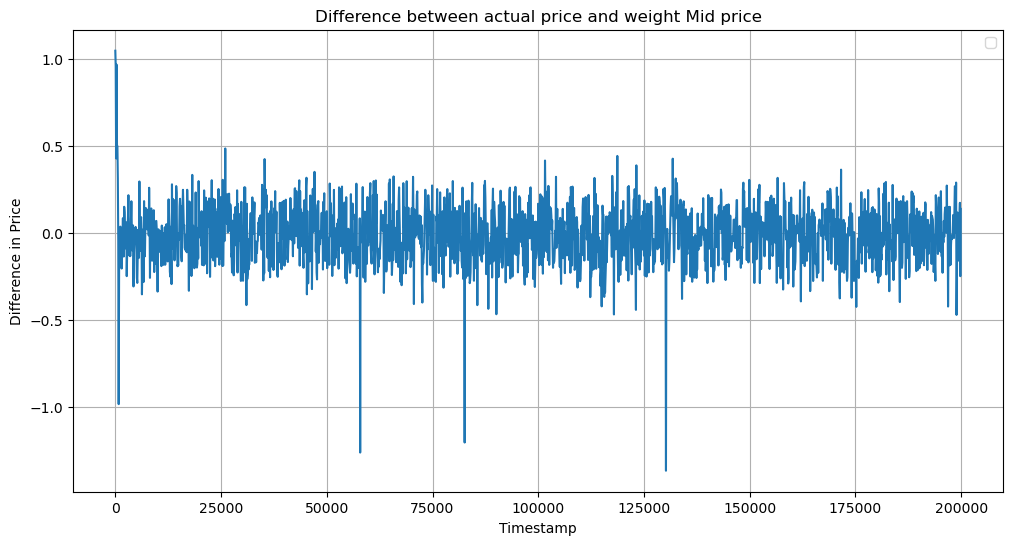

In [ ]:
df_kelp = df_check[df_check['product'] == 'KELP']
time = df_kelp['timestamp']

print(list(df_kelp['mid_price']))

df_kelp_rolling_mid = [(x) for x in df_kelp['mid_price'].rolling(window=4).mean()]

df_kelp_weighted_mid = [(x) for x in mid_weight]


df_kelp_mid_std = [(df_kelp_weighted_mid[i] - list(df_kelp['profit_and_loss'])[i]  - 2026 ) for i in range(len(time))]

plt.figure(figsize=(12, 6))
plt.plot(time, df_kelp_mid_std)
plt.xlabel('Timestamp')
plt.ylabel('Difference in Price')
plt.title('Difference between actual price and weight Mid price')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression model
model = LinearRegression()

kelp_mid = [int(x) for x in df_kelp['mid_price']]
rolling_mid = [(x) for x in df_kelp['mid_price'].rolling(window=4).mean()]

actual_price = list(df_kelp['profit_and_loss'])
time_lst = list(df_kelp['timestamp'])

Vars = []
y = []
time = []

for i in range(3,len(rolling_mid)):
    Vars.append([rolling_mid[i]])
    y.append(actual_price[i] + 2026)
    time.append(time_lst[i])

X = np.array(Vars)

# Fitting the model
model.fit(X, y)

# Prediction
y_pred = model.predict(X)
print("Predictions:", y_pred)

# Coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

print(math.sqrt(mean_squared_error(y, y_pred)))


Predictions: [2026.95848209 2026.46284311 2026.46284311 ... 2021.38254358 2021.63036307
 2021.38254358]
Intercept: 17.63806394782273
Coefficients: [0.99127796]
0.36098177830487727


In [108]:
import numpy as np

window_lst = [kelp_mid[0], kelp_mid[1], kelp_mid[2], kelp_mid[3]]
beta_0 = 17.63806394782273
beta_lst = [0.99127796]

fairprice = beta_0 + beta_lst[0] * np.mean(window_lst)

print(fairprice)

2026.4628498878228


In [ ]:
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression model
model = LinearRegression()

mid_curr = df_kelp_weighted_mid

#mid_roll = list(df_kelp['mid_price'].rolling(window=4).mean())

actual_price = list(df_kelp['profit_and_loss'])
time_lst = list(df_kelp['timestamp'])

Vars = []
y = []
time = []

for i in range(1,len(mid_curr)):
    Vars.append([mid_curr[i-1],mid_curr[i]])
    y.append(actual_price[i] + 2026)
    time.append(time_lst[i])

X = np.array(Vars)

# Fitting the model
model.fit(X, y)

# Prediction
y_pred = model.predict(X)
print("Predictions:", y_pred)

# Coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

print(math.sqrt(mean_squared_error(y, y_pred)))


Predictions: [2026.96622959 2026.52566339 2026.85034413 ... 2021.96907999 2021.59676659
 2021.88102291]
Intercept: 5.332276541015744
Coefficients: [0.19932855 0.79803589]
0.15265148889856073


In [74]:
import numpy as np

window_lst = [mid_curr[0],mid_curr[1]]
beta_0 = 5.332276541015744
beta_lst = [0.19932855, 0.79803589]

fairprice = beta_0 + sum([beta_lst[i] * window_lst[i] for i in range(len(window_lst))])

print(fairprice)

print(len(time))
print(len(y))

2026.9662367613132
1999
1999


C:\Users\amino\AppData\Local\Temp\ipykernel_26260\1338103091.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


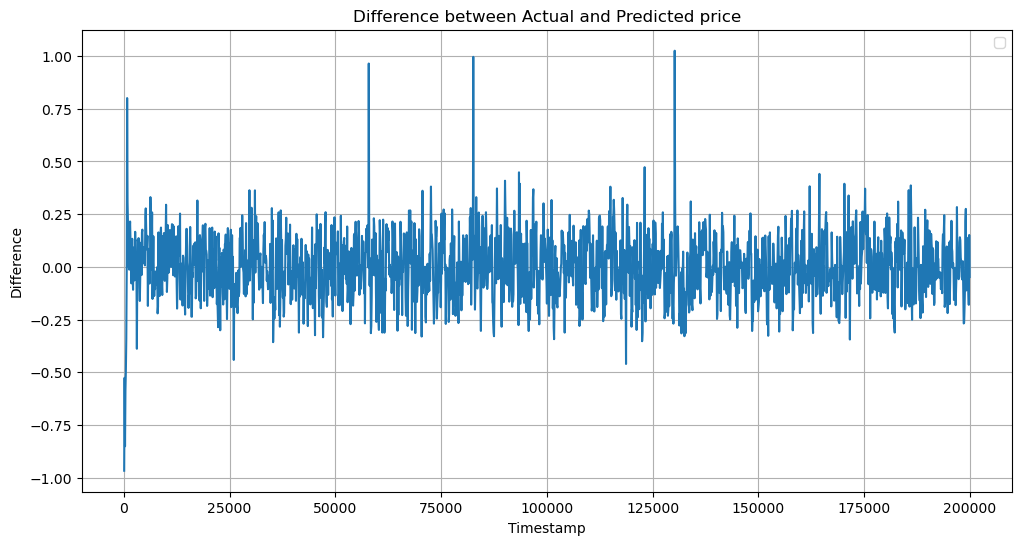

In [75]:
actual_pred_diff = [y[i] - y_pred[i] for i in range(len(y))]

plt.figure(figsize=(12, 6))
plt.plot(time, actual_pred_diff)
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.title('Difference between Actual and Predicted price')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\amino\AppData\Local\Temp\ipykernel_26260\2958218218.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


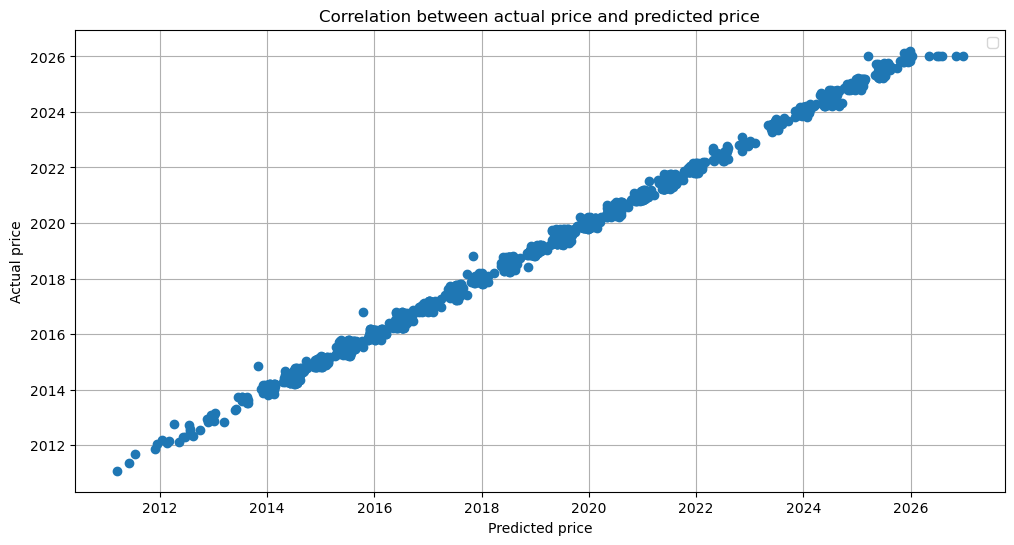

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(y_pred ,y ,'o')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Correlation between actual price and predicted price')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\amino\AppData\Local\Temp\ipykernel_26260\682843649.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


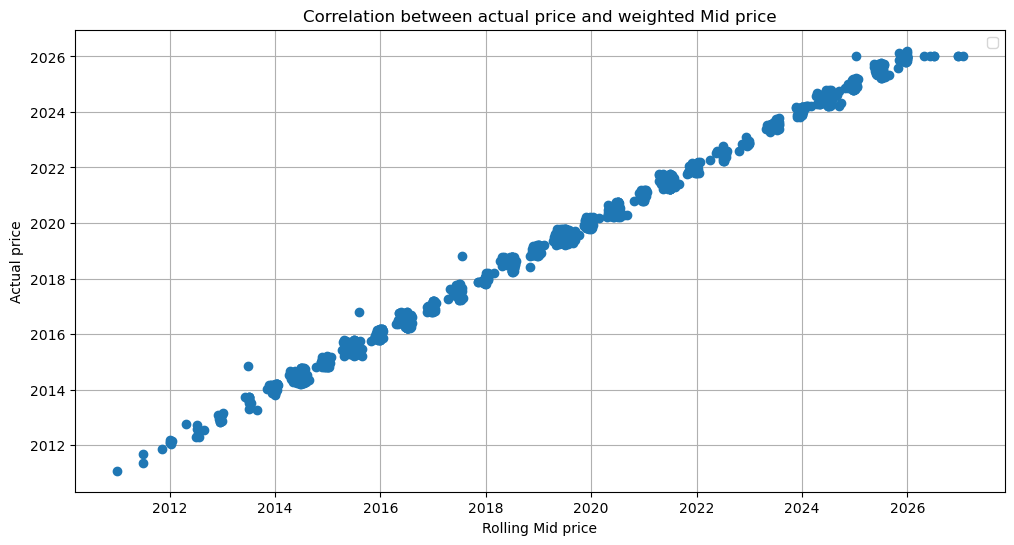

In [76]:
#df_kelp_rolling_mid = [x for x in df_kelp['mid_price'].rolling(window=4).mean()]
df_kelp_actual_price = [x + 2026 for x in df_kelp['profit_and_loss']]

plt.figure(figsize=(12, 6))
plt.plot(df_kelp_weighted_mid,df_kelp_actual_price,'o')
plt.xlabel('Rolling Mid price')
plt.ylabel('Actual price')
plt.title('Correlation between actual price and weighted Mid price')
plt.legend()
plt.grid(True)
plt.show()

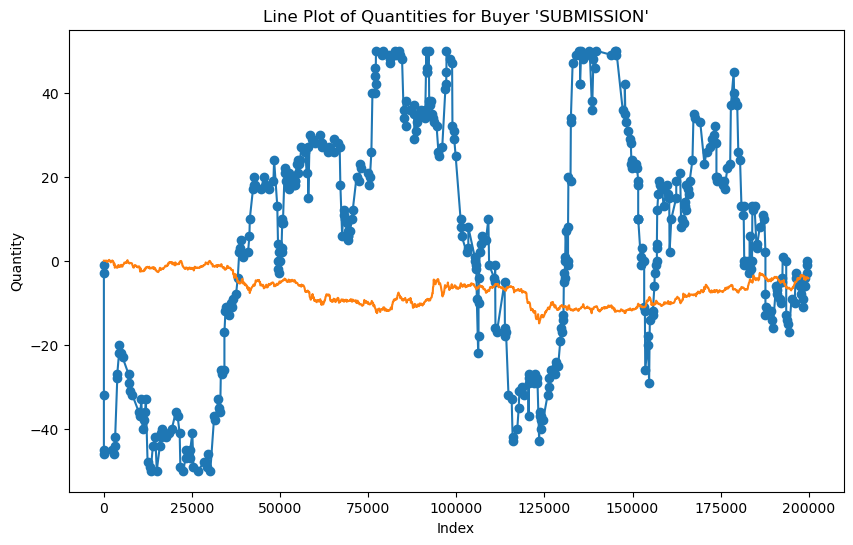

In [86]:
import json
import matplotlib.pyplot as plt

filename = "Log_kelp_ga.log"
json_str = ""
found = False

with open(filename, "r") as f:
    # Read lines until we find the marker "Trade History:"
    for line in f:
        if "Trade History:" in line:
            # If the same line contains the opening bracket, use it
            if "[" in line:
                json_str = line[line.find("["):]
            else:
                # Otherwise, assume the next line starts the JSON array
                json_str = next(f)
            found = True
            break

    if not found:
        raise ValueError("Could not find 'Trade History:' with '[' in file.")

    # Append the remainder of the file to the JSON string
    json_str += f.read()

# Parse the JSON string into a list of trade objects
data = json.loads(json_str)

# Calculate the total quantity and total money paid for buyer "SUBMISSION"
quantities = []
time_lst = []
quantity = 0
for item in data:
    if item.get("buyer") == "SUBMISSION":
        quantity += item.get("quantity", 0)
        quantities.append(quantity)
        timestamp = item.get("timestamp", 0)
        time_lst.append(timestamp)
    elif item.get("seller") == "SUBMISSION":
        quantity -= item.get("quantity", 0)
        quantities.append(quantity)
        timestamp = item.get("timestamp", 0)
        time_lst.append(timestamp)

# Plot the quantities as a line plot
plt.figure(figsize=(10, 6))
plt.plot(time_lst, quantities, marker='o', linestyle='-')
plt.plot(df_kelp['timestamp'], df_kelp['profit_and_loss'])
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.title("Line Plot of Quantities for Buyer 'SUBMISSION'")
plt.show()

In [15]:
from datamodel import OrderDepth, UserId, TradingState, Order

product = "KELP"
pos_limit = 50
dump_range = 30
max_profit = 1

orders = []
position = 19
sell_amount = 0

buy_quantity = 0
sell_quantity = 0

if pos_limit - dump_range <= position <= pos_limit:
    sell_amount = position
    orders.append(Order(product,round(2026) + 1,-sell_amount))
    sell_quantity += sell_amount

    print(position - sell_amount)

if -pos_limit <= position <= -pos_limit + dump_range:
    buy_amount = - position
    orders.append(Order(product,round(2026) - 1,buy_amount))
    buy_quantity += buy_amount

    print(position + buy_amount)

